<a href="https://colab.research.google.com/github/lukman-17/CLTV-Prediction/blob/main/CLTV_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df =pd.read_csv("/content/drive/MyDrive/insurance-ltv-decrease.csv")

In [4]:
df.head(5)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1001,Female,Urban,Bachelor,5L-10L,0,2,8405.0,More than 1,A,Platinum,64896.0
1,1002,Male,Urban,High School,5L-10L,1,5,6281.0,1,B,Platinum,47676.0
2,1003,Female,Rural,Bachelor,2L-5L,0,6,2099.0,More than 1,B,Platinum,69600.0
3,1004,Male,Rural,High School,5L-10L,1,2,4087.0,More than 1,B,Platinum,70692.0
4,1005,Male,Rural,Bachelor,5L-10L,0,2,0.0,More than 1,A,Platinum,40644.0


In [5]:
df.shape

(98415, 12)

In [6]:
df.describe()

,id,marital_status,vintage,claim_amount,cltv
count,98415.000000,98415.000000,98415.000000,98415.000000,98415.000000
mean,50880.986679,0.576030,4.690799,4241.649793,96481.050782
std,29506.197459,0.494188,2.295735,3209.001861,89488.040049
min,1001.000000,0.000000,0.000000,0.000000,19583.913880
25%,25604.500000,0.000000,3.000000,2321.000000,50832.000000
50%,50208.000000,1.000000,5.000000,4009.000000,65880.000000
75%,74811.500000,1.000000,7.000000,5983.000000,102540.000000
max,106023.000000,1.000000,8.000000,31894.000000,724068.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98415 entries, 0 to 98414
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              98415 non-null  int64  
 1   gender          98415 non-null  object 
 2   area            98415 non-null  object 
 3   qualification   98415 non-null  object 
 4   income          98415 non-null  object 
 5   marital_status  98415 non-null  int64  
 6   vintage         98415 non-null  int64  
 7   claim_amount    98415 non-null  float64
 8   num_policies    98415 non-null  object 
 9   policy          98415 non-null  object 
 10  type_of_policy  98415 non-null  object 
 11  cltv            98415 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 9.0+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

,0
id,0
gender,0
area,0
qualification,0
income,0
marital_status,0
vintage,0
claim_amount,0
num_policies,0
policy,0


# **EDA**

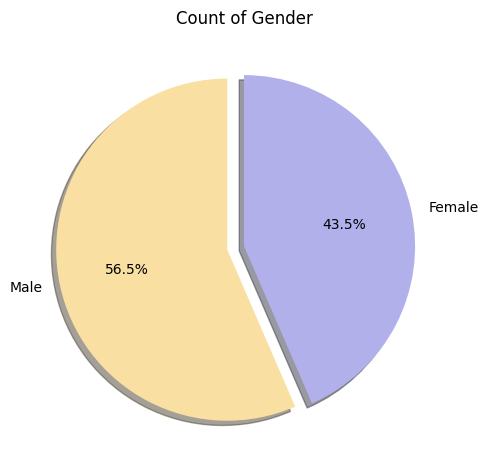

In [10]:
gender_counts = df['gender'].value_counts()
colors = ['#F9E0A2', '#B2B0EA'][:len(gender_counts)]

# Plot the pie chart
plt.pie(gender_counts, labels=gender_counts.index, shadow=True,startangle = 90, explode=(0.1,0), autopct='%1.1f%%', colors=colors)
plt.title('Count of Gender')
plt.tight_layout()
plt.show()

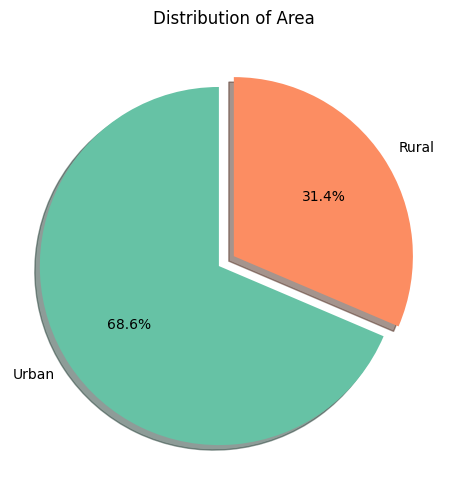

In [11]:
area_counts = df['area'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', shadow=True,explode=(0.1,0), startangle=90,colors=sns.color_palette('Set2'))
plt.title('Distribution of Area')
plt.tight_layout()
plt.show()

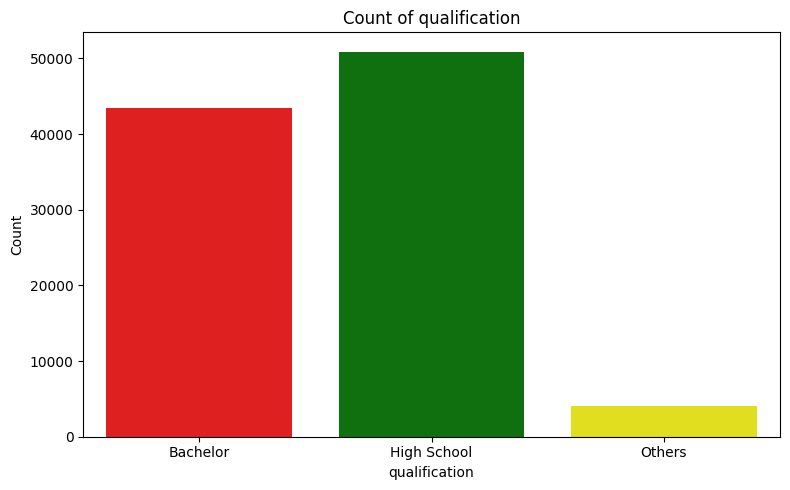

In [12]:
#qualification-Highest Qualification of the customer

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='qualification',palette=["red","green","yellow"])
plt.title('Count of qualification')
plt.xlabel('qualification')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

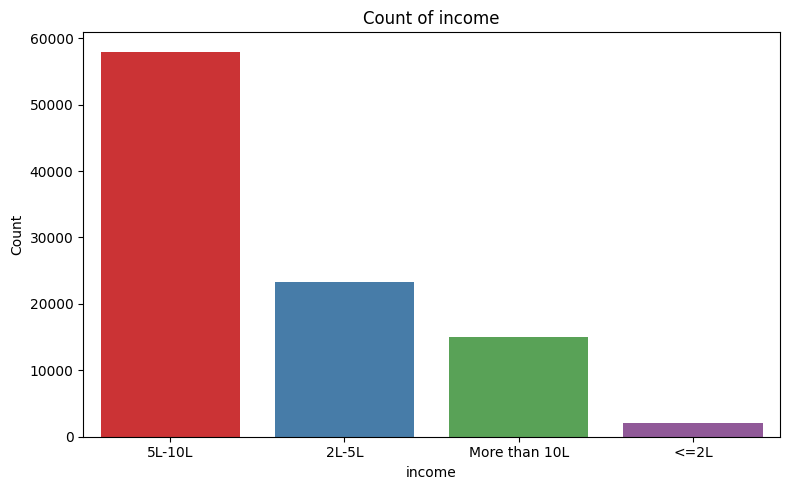

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='income',palette='Set1')
plt.title('Count of income')
plt.xlabel('income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

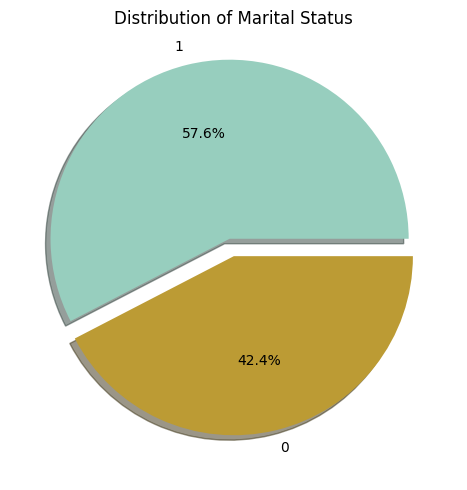

In [14]:
marital_status_counts = df['marital_status'].value_counts()
colors = ['#97CEBE','#BC9B34'][:len(marital_status_counts)]

plt.figure(figsize=(8,5))
plt.pie(marital_status_counts,labels=marital_status_counts.index, autopct='%1.1f%%', shadow=True,explode=(0.1,0),colors=colors)
plt.title('Distribution of Marital Status')
plt.tight_layout()
plt.show()

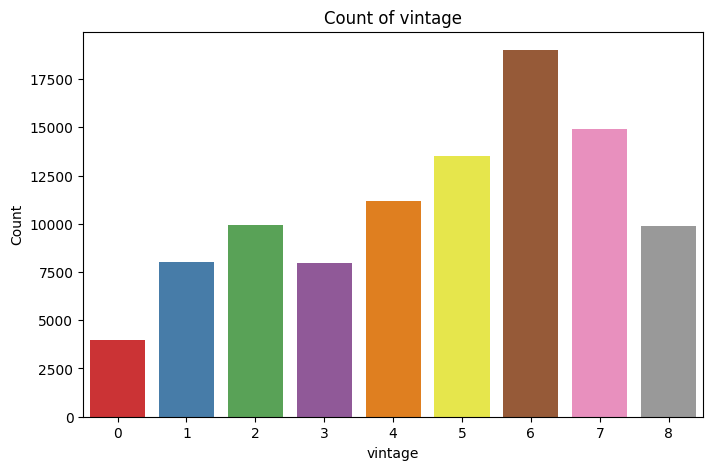

In [15]:
#vintage-No. of years since the first policy date
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='vintage',palette='Set1')
plt.title('Count of vintage')
plt.xlabel('vintage')
plt.ylabel('Count')
plt.show()

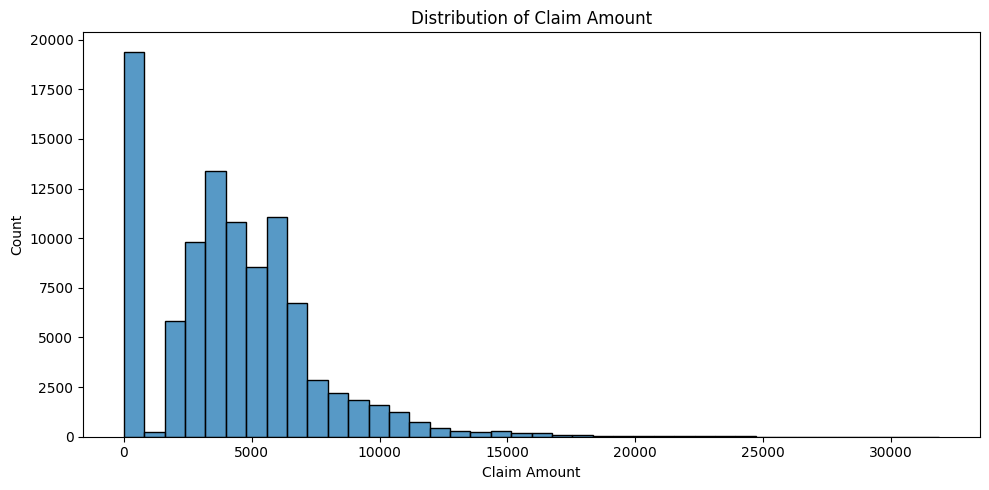

In [16]:
#claim_amount-Total Amount Claimed by the customer (in rupees)
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='claim_amount',bins=40,edgecolor ='black')
plt.title('Distribution of Claim Amount')
plt.xlabel('Claim Amount')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


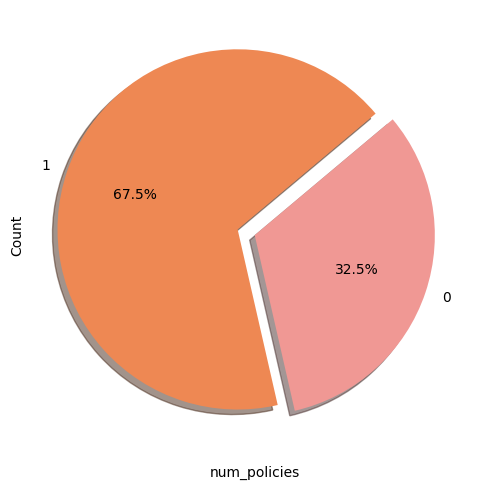

In [17]:
#num_policies-Total no. of policies issued by the customer
num_policies = df['num_policies'].value_counts()
colors = ['#EE8853', '#F09894'][:len(num_policies)]

plt.figure(figsize=(8, 5))
plt.pie(num_policies,labels=marital_status_counts.index, autopct='%1.1f%%', shadow=True,explode=(0.1,0), startangle=40,colors=colors)
plt.xlabel('num_policies')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

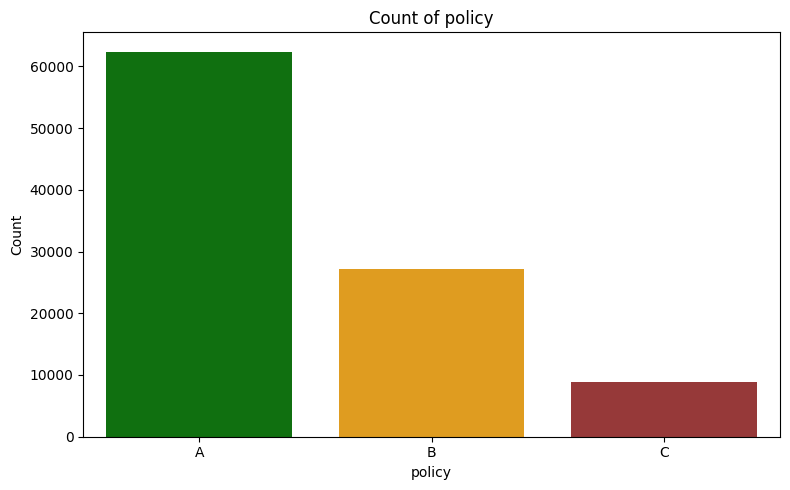

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='policy',palette=['green','orange','brown'])
plt.title('Count of policy')
plt.xlabel('policy')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


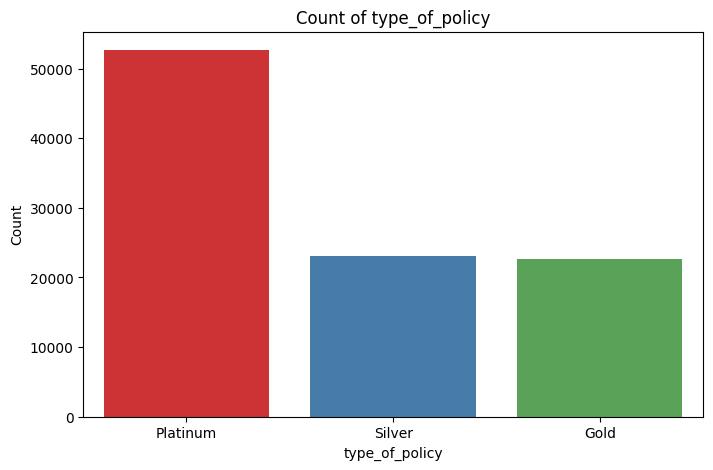

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type_of_policy',palette='Set1')
plt.title('Count of type_of_policy')
plt.xlabel('type_of_policy')
plt.ylabel('Count')
plt.show()

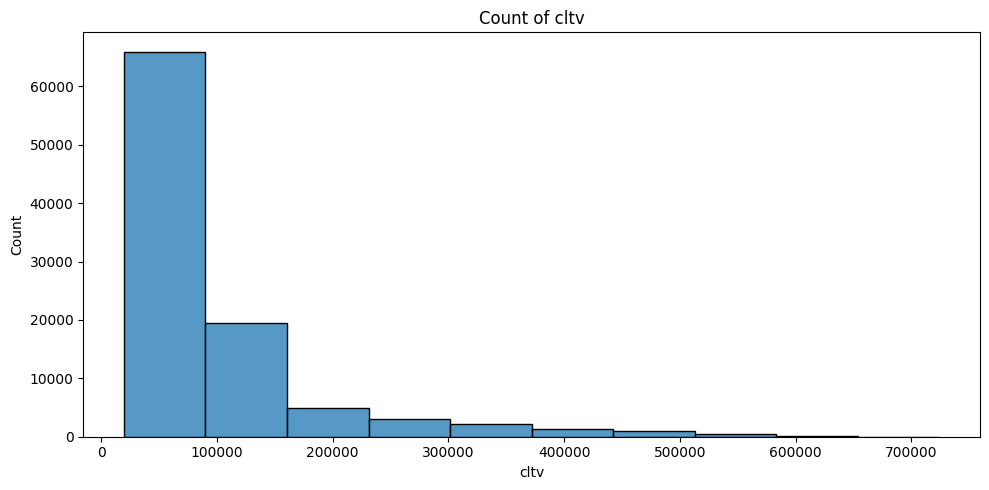

In [20]:
#cltv- Customer life time value (Target Variable)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='cltv', bins=10, edgecolor='black',palette='Set1')
plt.title('Count of cltv')
plt.xlabel('cltv')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [21]:
df.drop(columns=['id'],inplace=True)

In [22]:
# mapping on income
income_mapping = {
    "<=2L": 1,
    "2L-5L": 2,
    "5L-10L": 3,
    "More than 10L": 4
}
num_policies_mapping = {
    "1": 1,
    "More than 1": 2
}

# Apply ordinal encoding
df["income"] = df["income"].map(income_mapping)
df["num_policies"] = df["num_policies"].map(num_policies_mapping)

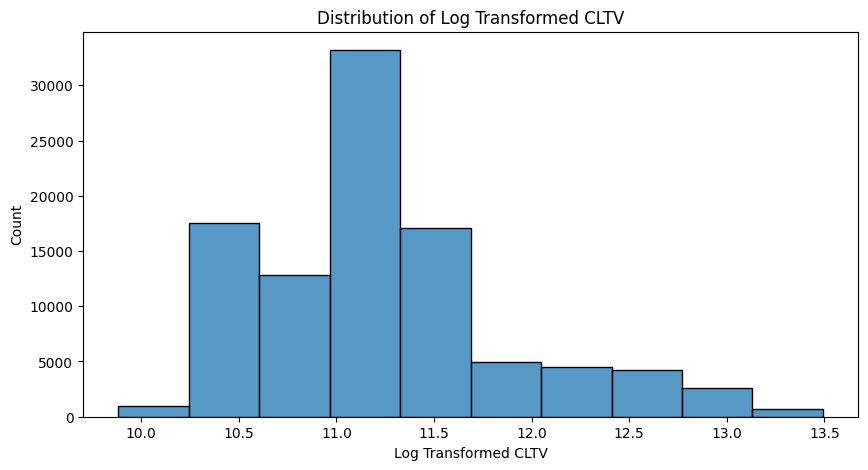

In [23]:
#log transformation to remove skeweness

df['cltv_log'] = np.log1p(df['cltv'])

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='cltv_log', bins=10, edgecolor='black', palette='Set1')
plt.title('Distribution of Log Transformed CLTV')
plt.xlabel('Log Transformed CLTV')
plt.ylabel('Count')
plt.show()

In [24]:
df.isnull().sum()

,0
gender,0
area,0
qualification,0
income,0
marital_status,0
vintage,0
claim_amount,0
num_policies,0
policy,0
type_of_policy,0


In [25]:
# label encoding categorical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['gender', 'area', 'qualification', 'num_policies', 'policy', 'type_of_policy']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())


   gender  area  qualification  income  marital_status  vintage  claim_amount  \
0       0     1              0       3               0        2        8405.0   
1       1     1              1       3               1        5        6281.0   
2       0     0              0       2               0        6        2099.0   
3       1     0              1       3               1        2        4087.0   
4       1     0              0       3               0        2           0.0   

   num_policies  policy  type_of_policy     cltv   cltv_log  
0             1       0               1  64896.0  11.080557  
1             0       1               1  47676.0  10.772204  
2             1       1               1  69600.0  11.150534  
3             1       1               1  70692.0  11.166102  
4             1       0               1  40644.0  10.612631  


In [26]:
#train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['cltv'])
y = df['cltv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")


Training set features shape: (78732, 11)
Testing set features shape: (19683, 11)
Training set target shape: (78732,)
Testing set target shape: (19683,)


Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)

print("Linear Regression Evaluation:")
print("R-squared:", r2_score(y_test, lr_pred))
print("Mean Squared Error:", mean_squared_error(y_test, lr_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, lr_pred)))

Linear Regression Evaluation:
R-squared: 0.8580031467454229
Mean Squared Error: 1137899557.5482326
Mean Absolute Error: 23619.33770818231
Root Mean Squared Error: 33732.76682319777


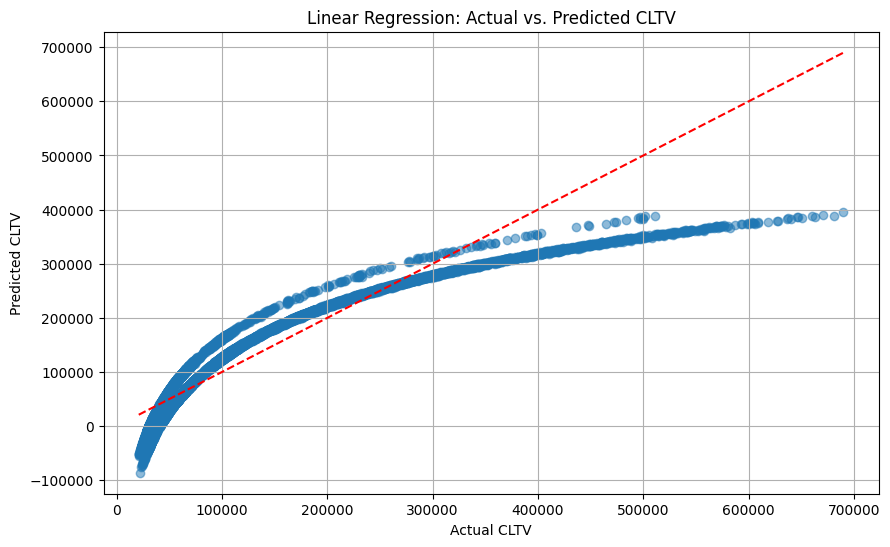

In [28]:
# Actual vs Predicted pot for Linear Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual CLTV")
plt.ylabel("Predicted CLTV")
plt.title("Linear Regression: Actual vs. Predicted CLTV")
plt.grid(True)
plt.show()

Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=3, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_pred = rf_model.predict(X_test_scaled)

print("Random Forest Regression Evaluation:")
print("R-squared:", r2_score(y_test, rf_pred))
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, rf_pred)))

Random Forest Regression Evaluation:
R-squared: 0.9999996755674192
Mean Squared Error: 2599.858248517082
Mean Absolute Error: 5.389998635334537
Root Mean Squared Error: 50.98880512933287


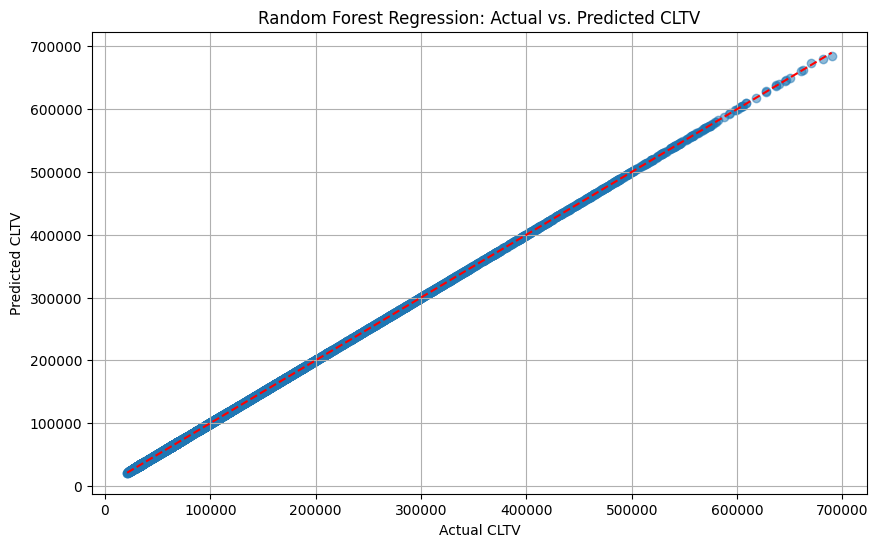

In [30]:
# Actual vs Predicted pot for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual CLTV")
plt.ylabel("Predicted CLTV")
plt.title("Random Forest Regression: Actual vs. Predicted CLTV")
plt.grid(True)
plt.show()

Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor( splitter='best', criterion='friedman_mse',  max_depth=10, min_samples_split=30, random_state=42)
dt_model.fit(X_train_scaled, y_train)

dt_pred = dt_model.predict(X_test_scaled)

print("Decision Tree Regression Evaluation:")
print("R-squared:", r2_score(y_test, dt_pred))
print("Mean Squared Error:", mean_squared_error(y_test, dt_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, dt_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, dt_pred)))

Decision Tree Regression Evaluation:
R-squared: 0.9999882840660236
Mean Squared Error: 93886.27833997134
Mean Absolute Error: 95.52502700962123
Root Mean Squared Error: 306.408678630308


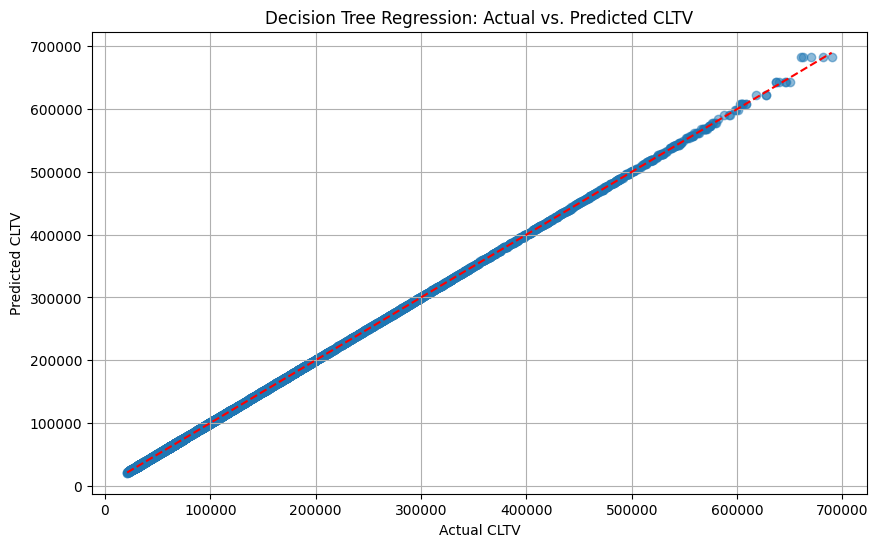

In [32]:
# Actual vs Predicted pot for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual CLTV")
plt.ylabel("Predicted CLTV")
plt.title("Decision Tree Regression: Actual vs. Predicted CLTV")
plt.grid(True)
plt.show()

AdaBoost Regressor

In [33]:
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor(n_estimators=100, random_state=42,learning_rate=0.001)
ada_model.fit(X_train_scaled, y_train)

ada_pred = ada_model.predict(X_test_scaled)

print("AdaBoost Regression Evaluation:")
print("R-squared:", r2_score(y_test, ada_pred))
print("Mean Squared Error:", mean_squared_error(y_test, ada_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, ada_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, ada_pred)))

AdaBoost Regression Evaluation:
R-squared: 0.9816757089761565
Mean Squared Error: 146842709.33126807
Mean Absolute Error: 8116.482108872199
Root Mean Squared Error: 12117.867359039217


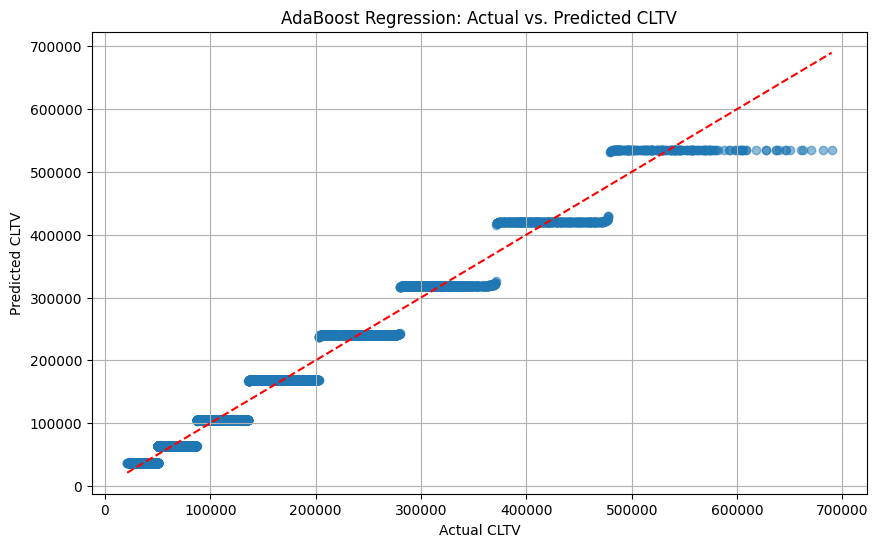

In [34]:
# Actual vs Predicted pot for AdaBoost Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ada_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual CLTV")
plt.ylabel("Predicted CLTV")
plt.title("AdaBoost Regression: Actual vs. Predicted CLTV")
plt.grid(True)
plt.show()

XGBoost Regressor

In [35]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

xgb_pred = xgb_model.predict(X_test_scaled)

print("XGBoost Regression Evaluation:")
print("R-squared:", r2_score(y_test, xgb_pred))
print("Mean Squared Error:", mean_squared_error(y_test, xgb_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, xgb_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, xgb_pred)))

XGBoost Regression Evaluation:
R-squared: 0.9988315707734353
Mean Squared Error: 9363271.575819725
Mean Absolute Error: 670.7500702287823
Root Mean Squared Error: 3059.9463354476866


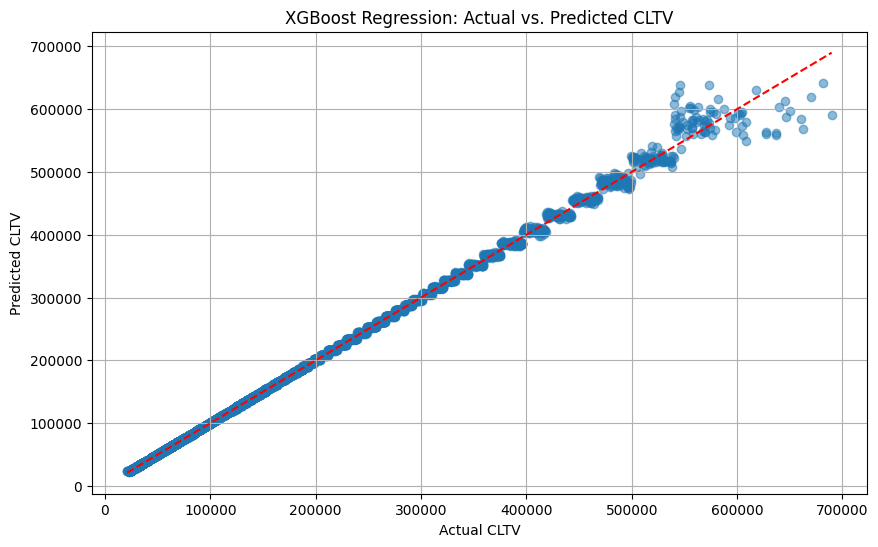

In [36]:
# Actual vs Predicted pot for XGBoost Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual CLTV")
plt.ylabel("Predicted CLTV")
plt.title("XGBoost Regression: Actual vs. Predicted CLTV")
plt.grid(True)
plt.show()

####Table for Actual vs Predicted Value fot cltv

In [37]:
# Data Frame forr Actual vs Test Values
results_df = pd.DataFrame({'Actual CLTV': y_test})
results_df['Linear Regression'] = lr_pred
results_df['Random Forest'] = rf_pred
results_df['Decision Tree'] = dt_pred
results_df['AdaBoost'] = ada_pred
results_df['XGBoost'] = xgb_pred

# Display the first 20 rows of the DataFrame
results_df.head(20)

,Actual CLTV,Linear Regression,Random Forest,Decision Tree,AdaBoost,XGBoost
3656,60564.0,52582.668557,60563.892570,60614.723672,64125.838081,60720.128906
40671,66696.0,67400.022511,66696.021519,66729.393021,64125.838081,66777.429688
6529,64476.0,63749.908062,64476.000000,64479.040543,64125.838081,64305.933594
61755,63672.0,63658.669212,63672.000000,63674.041994,64125.838081,63759.695312
45183,89784.0,146296.214949,89784.677859,89647.106969,104328.905225,89864.390625
62545,34668.0,15015.852506,34668.000000,34693.395857,36008.663620,34768.894531
60394,64356.0,100168.305987,64356.000000,64244.996731,64125.838081,64203.835938
1761,332844.0,293866.972305,332817.932608,332811.571574,319109.860246,338252.343750
48079,64128.0,65559.246265,64128.000000,64040.457466,64125.838081,64092.058594
54806,36264.0,20224.031865,36264.000000,36227.145580,36008.663620,36234.730469


In [38]:
comparison_df = results_df[['Actual CLTV', 'Random Forest']].copy()

#  gender, area, and qualification columns from the original DataFrame
comparison_df['gender'] = X_test['gender'].values
comparison_df['area'] = X_test['area'].values
comparison_df['qualification'] = X_test['qualification'].values

In [39]:
# Define the mapping for gender
gender_mapping = {0: 'Female', 1: 'Male'}
comparison_df['gender'] = comparison_df['gender'].map(gender_mapping)

# Define the mapping for area
area_mapping = {0: 'Urban', 1: 'Rural'}
comparison_df['area'] = comparison_df['area'].map(area_mapping)

# Define the mapping for qualification
qualification_mapping = {0: 'Bachelor', 1: 'High School',2:'Others'}
comparison_df['qualification'] = comparison_df['qualification'].map(qualification_mapping)

In [40]:
comparison_df.head(20)

,Actual CLTV,Random Forest,gender,area,qualification
3656,60564.0,60563.892570,Female,Urban,Bachelor
40671,66696.0,66696.021519,Female,Rural,Bachelor
6529,64476.0,64476.000000,Male,Urban,Bachelor
61755,63672.0,63672.000000,Male,Rural,Bachelor
45183,89784.0,89784.677859,Female,Rural,High School
62545,34668.0,34668.000000,Male,Urban,High School
60394,64356.0,64356.000000,Male,Urban,High School
1761,332844.0,332817.932608,Male,Rural,High School
48079,64128.0,64128.000000,Male,Rural,High School
54806,36264.0,36264.000000,Female,Rural,High School


#Comparirion of All Models

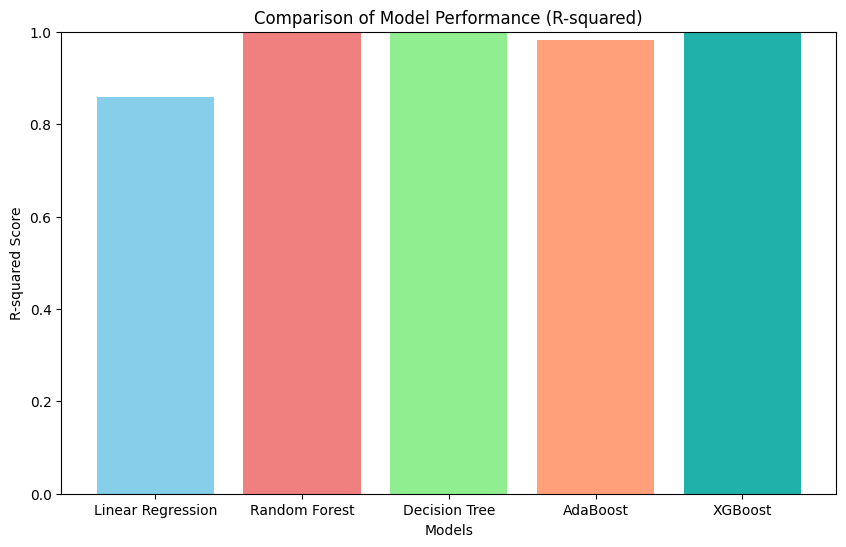

In [41]:
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost','XGBoost']
r2_scores = [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred), r2_score(y_test, dt_pred), r2_score(y_test, ada_pred), r2_score(y_test, xgb_pred)]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen','yellow'])
plt.xlabel("Models")
plt.ylabel("R-squared Score")
plt.title("Comparison of Model Performance (R-squared)")
plt.ylim(0, 1)
plt.show()

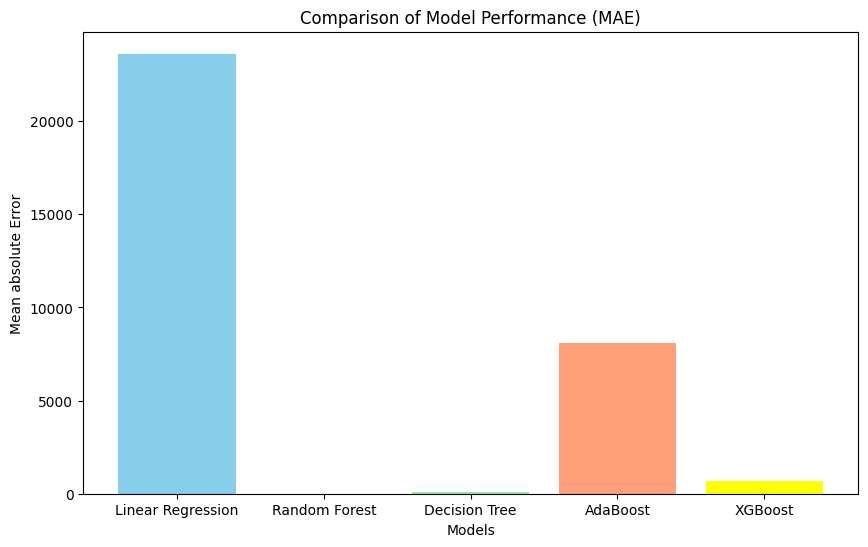

In [42]:
# Example models and MSE scores
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost','XGBoost']
mae_scores = [mean_absolute_error(y_test, lr_pred),
              mean_absolute_error(y_test, rf_pred),
              mean_absolute_error(y_test, dt_pred),
              mean_absolute_error(y_test, ada_pred),
              mean_absolute_error(y_test, xgb_pred)]

# Create the bar plot for MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon','yellow'])
plt.xlabel("Models")
plt.ylabel("Mean absolute Error")
plt.title("Comparison of Model Performance (MAE)")
plt.show()


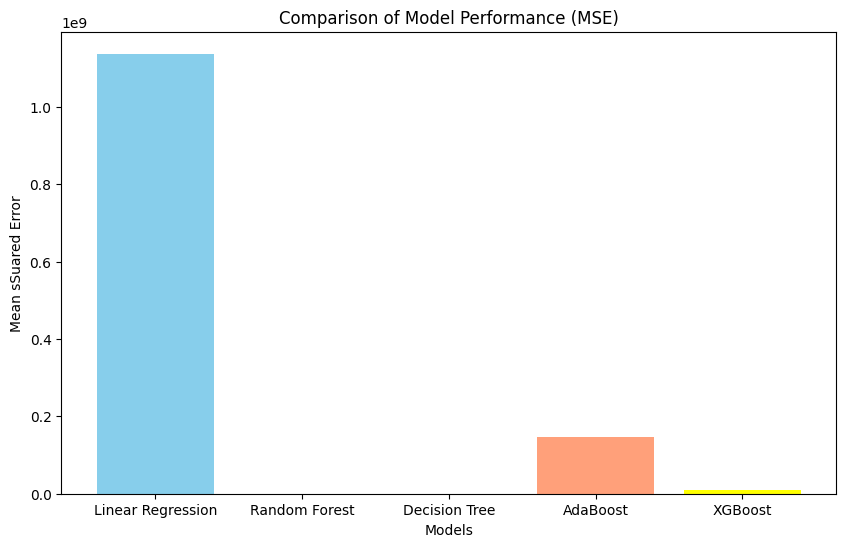

In [43]:
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost','XGBoost']
mse_scores = [mean_squared_error(y_test, lr_pred),
              mean_squared_error(y_test, rf_pred),
              mean_squared_error(y_test, dt_pred),
              mean_squared_error(y_test, ada_pred),
              mean_squared_error(y_test, xgb_pred)]

# Create the bar plot for MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon','yellow'])
plt.xlabel("Models")
plt.ylabel("Mean sSuared Error")
plt.title("Comparison of Model Performance (MSE)")
plt.show()

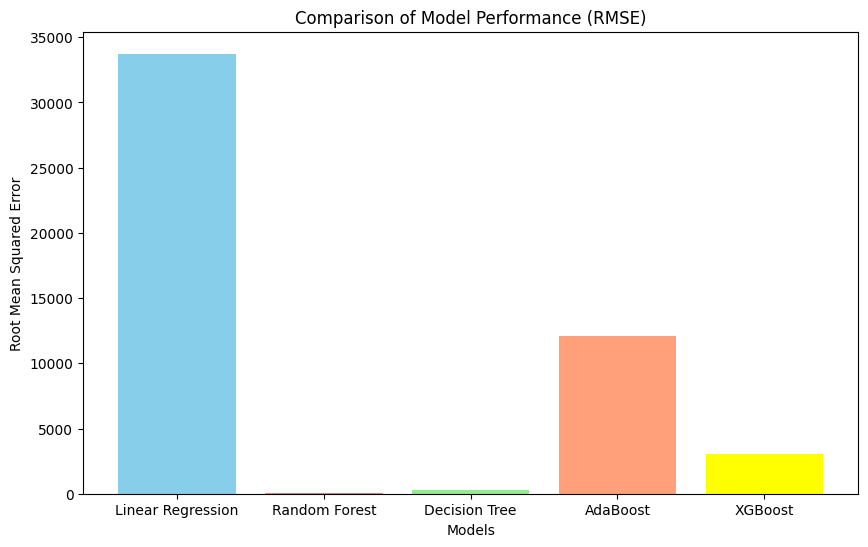

In [44]:
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost','XGBoost']
rmse_scores = [np.sqrt(mean_squared_error(y_test, lr_pred)),
              np.sqrt(mean_squared_error(y_test, rf_pred)),
              np.sqrt(mean_squared_error(y_test, dt_pred)),
              np.sqrt(mean_squared_error(y_test, ada_pred)),
              np.sqrt(mean_squared_error(y_test, xgb_pred))]

# Create the bar plot for RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon','yellow'])
plt.xlabel("Models")
plt.ylabel("Root Mean Squared Error")
plt.title("Comparison of Model Performance (RMSE)")
plt.show()

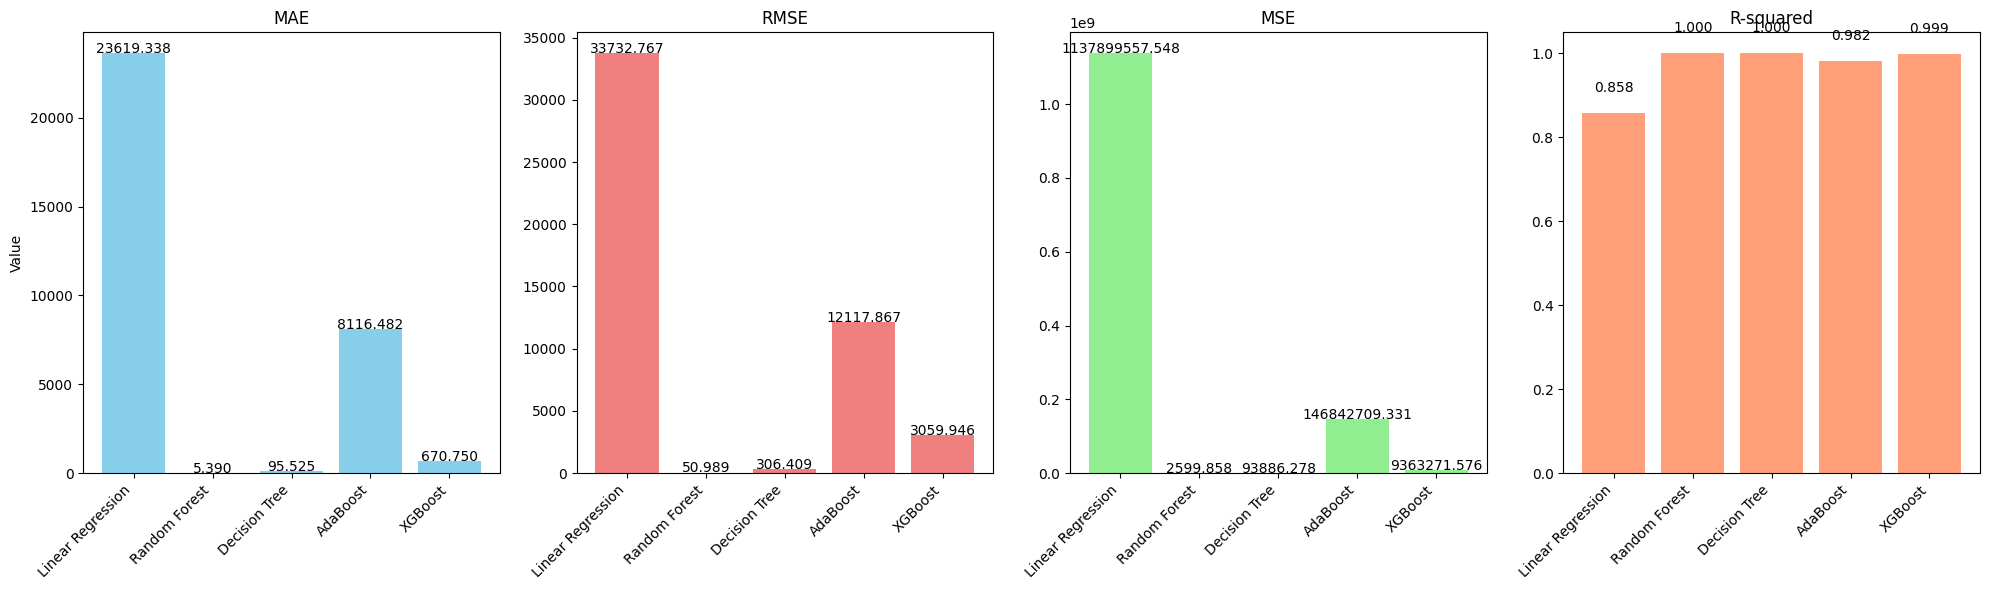

In [45]:
#All Models
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost', 'XGBoost']
r2_scores = [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred), r2_score(y_test, dt_pred), r2_score(y_test, ada_pred), r2_score(y_test, xgb_pred)]
mae_scores = [mean_absolute_error(y_test, lr_pred), mean_absolute_error(y_test, rf_pred), mean_absolute_error(y_test, dt_pred), mean_absolute_error(y_test, ada_pred), mean_absolute_error(y_test, xgb_pred)]
mse_scores = [mean_squared_error(y_test, lr_pred), mean_squared_error(y_test, rf_pred), mean_squared_error(y_test, dt_pred), mean_squared_error(y_test, ada_pred), mean_squared_error(y_test, xgb_pred)]
rmse_scores = [np.sqrt(mean_squared_error(y_test, lr_pred)), np.sqrt(mean_squared_error(y_test, rf_pred)), np.sqrt(mean_squared_error(y_test, dt_pred)), np.sqrt(mean_squared_error(y_test, ada_pred)), np.sqrt(mean_squared_error(y_test, xgb_pred))]

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=False)

# MAE plot
axes[0].bar(models, mae_scores, color='skyblue')
axes[0].set_title("MAE")
axes[0].set_ylabel("Value")
axes[0].set_xticklabels(models, rotation=45, ha='right')
for i, v in enumerate(mae_scores):
    axes[0].text(i, v + 10, f"{v:.3f}", ha='center', fontsize=10)

# RMSE plot
axes[1].bar(models, rmse_scores, color='lightcoral')
axes[1].set_title("RMSE")
axes[1].set_xticklabels(models, rotation=45, ha='right')
for i, v in enumerate(rmse_scores):
    axes[1].text(i, v + 10, f"{v:.3f}", ha='center', fontsize=10)

# MSE plot
axes[2].bar(models, mse_scores, color='lightgreen')
axes[2].set_title("MSE")
axes[2].set_xticklabels(models, rotation=45, ha='right')
for i, v in enumerate(mse_scores):
    axes[2].text(i, v + 10, f"{v:.3f}", ha='center', fontsize=10)

# R-squared plot
axes[3].bar(models, r2_scores, color='lightsalmon')
axes[3].set_title("R-squared")
axes[3].set_xticklabels(models, rotation=45, ha='right')
for i, v in enumerate(r2_scores):
    axes[3].text(i, v + 0.05, f"{v:.3f}", ha='center', fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [53]:
import joblib

# Assuming 'rf_model' is your trained RandomForestRegressor model
# Save the model to a file
joblib.dump(rf_model, '/content/drive/My Drive/random_forest_model.pkl')


['/content/drive/My Drive/random_forest_model.pkl']

In [55]:
# After fitting your StandardScaler in your training script:
import joblib
# ... (your existing code) ...

# Save the scaler to a file in your Google Drive
joblib.dump(scaler, '/content/drive/My Drive/scaler.pkl')

['/content/drive/My Drive/scaler.pkl']

#Streamlit Implemtation

In [46]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!pip install pyngrok

In [47]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [48]:
!ngrok config add-authtoken 2tTW3fmIKeQimUBmTlh69feZvj9_5vmWTF4Hd7V9iQtRT5Zyz

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [56]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib  # For loading the saved model and scaler

# Load the trained Random Forest model and scaler
rf_model = joblib.load('/content/drive/My Drive/random_forest_model.pkl')
scaler = joblib.load('/content/drive/My Drive/scaler.pkl')

# Define categorical mappings
income_mapping = {
    "<=2L": 1,
    "2L-5L": 2,
    "5L-10L": 3,
    "More than 10L": 4
}
num_policies_mapping = {
    "1": 1,
    "More than 1": 2
}
label_encoders = {
    'gender': {'Female': 0, 'Male': 1},
    'area': {'Urban': 0, 'Rural': 1},
    'qualification': {'Bachelor': 0, 'High School': 1, 'Others': 2},
    'policy': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4},
    'type_of_policy': {'A': 0, 'B': 1, 'C': 2}
}

# Function to preprocess input and predict CLTV
def predict_cltv(input_data):
    input_df = pd.DataFrame([input_data])

    # Apply categorical mappings
    input_df["income"] = input_df["income"].map(income_mapping)
    input_df["num_policies"] = input_df["num_policies"].map(num_policies_mapping)

    for col, mapping in label_encoders.items():
        input_df[col] = input_df[col].map(mapping)

    # Scale the input data using the pre-fitted scaler
    input_scaled = scaler.transform(input_df)

    # Make prediction using the trained model
    cltv_prediction = rf_model.predict(input_scaled)[0]
    return cltv_prediction

# Streamlit App UI
st.title("CLTV Prediction App")

# User Inputs
gender = st.selectbox('Gender', ['Female', 'Male'])
area = st.selectbox('Area', ['Urban', 'Rural'])
qualification = st.selectbox('Qualification', ['Bachelor', 'High School', 'Others'])
income = st.selectbox('Income', ["<=2L", "2L-5L", "5L-10L", "More than 10L"])
marital_status = st.selectbox("Marital Status", ['Single', 'Married'])
vintage = st.number_input("Vintage", min_value=0, max_value=100)
claim_amount = st.number_input("Claim Amount", min_value=0.0)
num_policies = st.selectbox("Number of Policies", ["1", "More than 1"])
policy = st.selectbox("Policy", ['A', 'B', 'C', 'D', 'E'])
type_of_policy = st.selectbox('Type of Policy', ['A', 'B', 'C'])

# Create input dictionary
input_data = {
    'gender': gender,
    'area': area,
    'qualification': qualification,
    'income': income,
    'marital_status': marital_status,
    'vintage': vintage,
    'claim_amount': claim_amount,
    'num_policies': num_policies,
    'policy': policy,
    'type_of_policy': type_of_policy
}

# Predict on button click
if st.button("Predict CLTV"):
    cltv = predict_cltv(input_data)
    st.success(f"The predicted CLTV is: {cltv}")


Overwriting app.py


In [50]:
!pkill -f ngrok

In [57]:
from pyngrok import ngrok
import subprocess

# Start Streamlit app
subprocess.Popen(['streamlit', 'run', 'app.py', '--server.port', '8501'])

# Open ngrok tunnel
public_url = ngrok.connect(addr='8501')
print(f"Access the Streamlit app here: {public_url}")

Access the Streamlit app here: NgrokTunnel: "https://d009-34-168-246-221.ngrok-free.app" -> "http://localhost:8501"
